### Clasificación de imágenes de personas con mascarilla

#### Parte 2 con más imagenes

#### Carga de Librerías

In [1]:
from keras.utils import image_dataset_from_directory

#Reescalar
from keras.layers import (
    Rescaling, 
    RandomFlip, 
    RandomRotation,
    RandomZoom, 
    RandomTranslation
)

from keras.models import Sequential  #Falta esta importación

# 4.2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout
)

# 4.4
import numpy as np
from tensorflow.keras.preprocessing import image

#### Carga de los datos

In [3]:
train_dataset = image_dataset_from_directory(
 '.\\data',
 image_size=(128, 128),
 labels='inferred',
 label_mode='binary',
 class_names=['with_mask', 'without_mask']
)
test_dataset = image_dataset_from_directory(
 '.\\data',
 image_size=(128, 128),
 labels='inferred',
 label_mode='binary',
 class_names=['with_mask', 'without_mask']
)

#Redimensionar a 128 x 128

#subset hace falta

Found 7553 files belonging to 2 classes.
Found 7553 files belonging to 2 classes.


Ahora es importante normalizar los valores de la imagen a una escala de 0 a 1

Podemos usar **Rescaling** y por otro lado para prevenir el overfitting usaremos el **data augmentation**

In [4]:
normalization = Rescaling(1./255)

data_augmentation = Sequential([
 RandomFlip("horizontal"), #Volteo horizontal
 RandomRotation(0.2), #Rotaciones 20% de 360º
 RandomZoom(0.1), #Zoom hasta 10%
 RandomTranslation(0.1, 0.1) #Desplaz. vertical y horizontal
])
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(normalization(x)), y))

test_dataset = test_dataset.map(lambda x, y: (normalization(x), y))

#### 4.2 Construcción y compilación de la CNN básica con Keras

Además de las capas conocidas **Input** y **Dense** añadiremos estas nuevas:

- Conv2D -> Convolucional
- MaxPooling2D -> Para realizar pooling
- Flatten -> Aplanado antes de Dense

In [5]:
model = keras.Sequential([
 Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)), #cambiado a 3
 MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D((2, 2)),
 Dropout(0.25),
 Flatten(),
 Dense(64, activation='relu'),
 Dense(1, activation='sigmoid') #lo cambiamos de 10 a 2 porque es binario (mascarilla o no mascarilla)
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\juan_\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

El modelo consta de dos capas convolucionales con ReLu como función de activación, seguidas de capas de pooling y una capa completamente conectada (la clásica capa oculta de neuronas vista en la unidad anterior) para la clasificación

#### 4.3 Entrenamiento, evaluación y visualización de resultados

Una vez hecha la CNN deberemos entrenarla

In [6]:
history = model.fit(
 train_dataset,
 validation_data=test_dataset,
 epochs=20,
 batch_size=32
)


Epoch 1/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 52s 209ms/step - accuracy: 0.7185 - loss: 0.5930 - val_accuracy: 0.8557 - val_loss: 0.3449
Epoch 2/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 43s 182ms/step - accuracy: 0.8541 - loss: 0.3518 - val_accuracy: 0.8851 - val_loss: 0.2744
Epoch 3/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 43s 183ms/step - accuracy: 0.8569 - loss: 0.3337 - val_accuracy: 0.8916 - val_loss: 0.2692
Epoch 4/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 43s 180ms/step - accuracy: 0.8705 - loss: 0.3174 - val_accuracy: 0.8823 - val_loss: 0.2669
Epoch 5/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 43s 180ms/step - accuracy: 0.8622 - loss: 0.3262 - val_accuracy: 0.8946 - val_loss: 0.2678
Epoch 6/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 43s 182ms/step - accuracy: 0.8764 - loss: 0.2911 - val_accuracy: 0.9049 - val_loss: 0.2267
Epoch 7/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 43s 179ms/step - accuracy: 0.8811 - loss: 0.2864 - val_accuracy: 0.9082 - val_loss: 0.2160
Epoch 8/20
237/237 ━━━━━━━━━━━━━━━━━━━━ 43s 181ms/step - accuracy: 0.8861 - loss: 0

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9355 - loss: 0.1548
Pérdida en test: 0.1563
Precisión en test: 0.9380


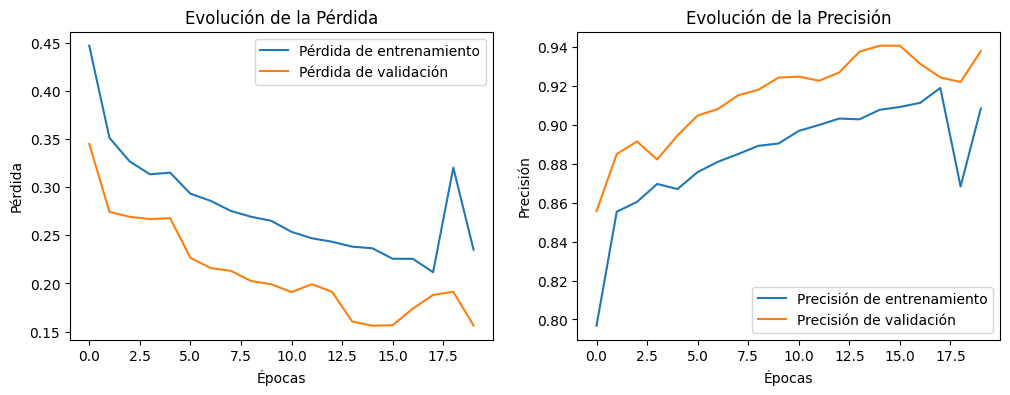

In [7]:
#Evaluación del modelo en el conjunto de test
loss, accuracy = model.evaluate(test_dataset)
print(f"Pérdida en test: {loss:.4f}")
print(f"Precisión en test: {accuracy:.4f}")
#Visualización de la evolución del entrenamiento
import matplotlib.pyplot as plt

epochs = len(history.history['loss'])  #Faltaba (obtenemos el número real de épocas entrenadas)

#Extraer los valores del historial
epochs_range = range(epochs)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Pérdida de entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la Pérdida')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Precisión de entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Evolución de la Precisión')
plt.show()

Como vemos los resultados son buenos

#### 4.4 Uso del modelo en predicciones

Una vez ha sido entrenado el modelo podemos utilizarlo para hacer predicciones con nuevas imágenes

Tenemos que cargar la imagen, procesarla igual que las imágenes del entrenamiento y pasarla al modelo

In [9]:
#Cargar la imagen y preprocesarla
#Alternamos entre fotoconmascarilla.jpeg y fotosinmascarilla.jpeg para probar el modelo
img = image.load_img("fotosinmascarilla.jpeg", target_size=(128, 128)) #224 estaba por defecto
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) #Añadir a batch
img_array /= 255.0 #Normalización

#Realizar la predicción
prediccion = model.predict(img_array)
#clase_predicha = np.argmax(prediccion) #para multiclase
clase_predicha = (prediccion > 0.5).astype(int)  #1 = Con mascarilla, 0 = Sin mascarilla
print(f"La imagen pertenece a la clase: {clase_predicha}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
La imagen pertenece a la clase: [[0]]


0 = Cono mascarilla

1 = Sin mascarilla

Como vemos, con las dos imágenes que hemos cogido de prueba, predice bien!!!!

In [11]:
from sklearn.metrics import classification_report

# Obtener etiquetas reales y predicciones del modelo
true_labels = []
pred_labels = []

for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_classes = (predictions > 0.5).astype(int)

    true_labels.extend(labels.numpy())
    pred_labels.extend(predicted_classes)

# Generar el reporte de clasificación
report = classification_report(true_labels, pred_labels, target_names=["Sin mascarilla", "Con mascarilla"])
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━

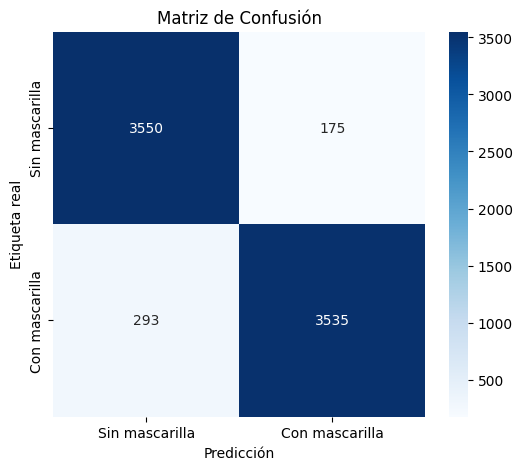

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener etiquetas reales y predicciones del modelo
true_labels = []
pred_labels = []

for images, labels in test_dataset:  # test_dataset ya contiene imágenes y etiquetas reales
    predictions = model.predict(images)  # Obtener predicciones
    predicted_classes = (predictions > 0.5).astype(int) # Obtener la clase con mayor probabilidad

    true_labels.extend(labels.numpy())  # Guardar etiquetas reales
    pred_labels.extend(predicted_classes)  # Guardar predicciones

# Generar la matriz de confusión
cm = confusion_matrix(true_labels, pred_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Sin mascarilla", "Con mascarilla"],
            yticklabels=["Sin mascarilla", "Con mascarilla"])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.title("Matriz de Confusión")
plt.show()


In [23]:
for images, labels in train_dataset.take(1):  # Tomamos un batch
    print(f"Forma de las imágenes: {images.shape}")
    print(f"Forma de las etiquetas: {labels.shape}")


Forma de las imágenes: (32, 128, 128, 3)
Forma de las etiquetas: (32, 1)


In [24]:
train_dataset = train_dataset.map(lambda x, y: (x, tf.squeeze(y)))
test_dataset = test_dataset.map(lambda x, y: (x, tf.squeeze(y)))
